### Scraping MLB stats from ESPN go###

In this exercise we will try to analyze the batting performances of different teams in Major League Baseball using the data available in the following link http://espn.go.com/mlb/stats/team/_/stat/batting 

We will first scrape the page corresponding to the 2015 season 

In [2]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015"

We will now scrape the table found in the above link. 

Following is a function which will take the above url and return a pandas dataframe corresponding to the table found in the given link. 

In [3]:
## Function to extract the data from the above url:

import requests
import lxml.html as lh
import pandas as pd

def SCRAPE_ESPN_MLB_STATS(url):
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    tr_elements = doc.xpath('//tr')
    col=[]  # collect column names into col
    T=tr_elements[1]
    i=0
    for t in T.iterchildren():
        i+=1
        name=t.text_content()
        col.append((name,[]))
    for j in range(2,len(tr_elements)):
        T=tr_elements[j]
        if len(T)!=15:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            if i>0:
                try:
                    data=data
                except:
                    print data,'cannot be converted to float, row,col=',j,i
                    data=None
            col[i][1].append(data)
            i+=1
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return df


Run the above function to scrape season 2015 stats.

In [4]:
## Call the above function to create the dataframe df_2015

df_2015 = SCRAPE_ESPN_MLB_STATS(url)

In [5]:
## Top rows of the data to test

df_2015.head()

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,308,17,5509,.269,162,1480,232,.340,.797,891,852,1,.457,2518,Toronto
1,272,19,5567,.251,162,1397,212,.323,.744,764,737,2,.421,2343,NY Yankees
2,279,32,5511,.257,162,1419,172,.325,.739,751,707,3,.413,2278,Texas
3,294,33,5640,.265,162,1496,161,.325,.740,748,706,4,.415,2339,Boston
4,274,49,5572,.265,162,1479,186,.315,.748,737,702,5,.432,2409,Colorado


We will now produce plots analyzing performance of different teams on different statistical parameters

Following is a function which will take the above dataframe and a list of column names as input and produces a set of plots corresponding to each of the column names provided

In [6]:
## Function to produce plots:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def produce_plots(df, col_names):
    col_names = ['HR','TB','RBI']
    x=df['TEAM']
    ind = range(len(x))
    for i in range(len(col_names)):
        y=df[col_names[i]]
        plt.figure(figsize=(8,5))
        plt.xticks(ind, x, rotation = 90)
        plt.bar(ind, y)
        plt.xlabel('Teams')
        plt.ylabel(col_names[i])
        plt.title('%s by teams'%(col_names[i]),fontsize = 20)
    

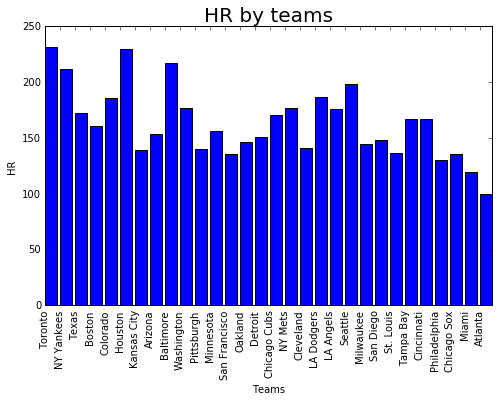

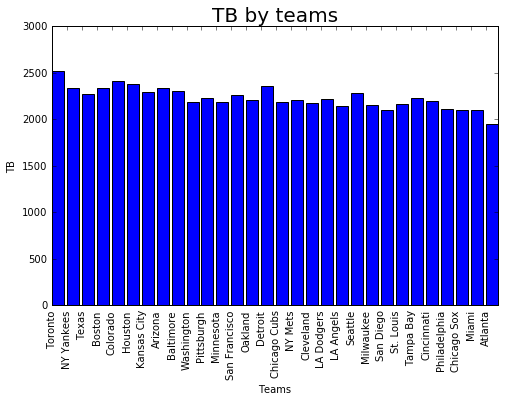

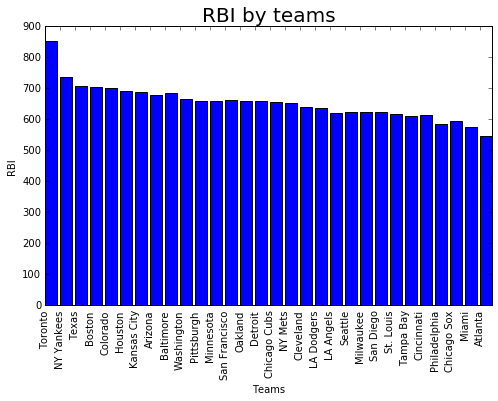

In [7]:
## call the function product_plots to plot the following metrics as per the requirement (Requirement is in the markdown below)
## HR: Home Runs
## TB: Total Bases
## RBI: Runs Batted In

col_names = ['HR','TB','RBI'] ## List of column names to pass into the function
produce_plots(df_2015,col_names)

Call the above function for the columns

HR: Home Runs

TB: Total Bases

RBI: Runs Batted In

We will now use the above functions to scrape for more seasons and analyze the performances over a period of 6 years from 2010-2015

In [8]:
## SCrape the data for a period of 6 years from 2010-2015

dfs={}
for year in xrange(0,6):
    link = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/201'+str(year)
    dfs[year]=SCRAPE_ESPN_MLB_STATS(link)

In [9]:
## Ensuring that we have the correct keys in the dictionary dfs

dfs.keys()

[0, 1, 2, 3, 4, 5]

Inorder to analyze performance of teams across seasons, we will need all the data in a single dataframe. 

Use appropriate pandas functions to combine the above dictionary of year:dataframe to produce one dataframe which has a new column corresponding to the year/season 

In [12]:
## Include the year column
for i in xrange(0,6):
    dfs[i]['year'] = 2010+i

## Combine all the dataframes into combined_df    
combined_df = dfs[0]
for i in xrange(1,6):
    combined_df = combined_df.append(dfs[i])

combined_df

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM,year
0,275,32,5567,.267,162,1485,201,.350,.786,859,823,1,.436,2427,NY Yankees,2010
1,358,22,5646,.268,162,1511,211,.339,.790,818,782,2,.451,2546,Boston,2010
2,295,37,5439,.247,162,1343,160,.333,.736,802,769,3,.403,2192,Tampa Bay,2010
3,293,30,5579,.272,162,1515,188,.338,.774,790,761,4,.436,2432,Cincinnati,2010
4,268,25,5635,.276,162,1556,162,.338,.757,787,740,5,.419,2360,Texas,2010
5,318,41,5568,.273,162,1521,142,.341,.762,781,749,6,.422,2347,Minnesota,2010
6,290,34,5581,.260,162,1451,166,.332,.745,772,736,7,.413,2307,Philadelphia,2010
7,270,54,5530,.263,162,1452,173,.336,.760,770,741,8,.425,2349,Colorado,2010
8,319,21,5495,.248,162,1364,257,.312,.766,755,732,9,.454,2496,Toronto,2010
9,263,21,5484,.268,162,1467,177,.332,.752,752,710,10,.420,2303,Chicago Sox,2010


Write a function which will take the above dataframe and a list of column names and produces a set of plots corresponding to each of the columns provided. Each plot is a set of subplots, where every subplot is a line graph of the column values over the 6 years for each of the teams in the dataframe.

Call the above function for the columns 

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

In [13]:
import matplotlib.pyplot as plt    
import numpy as np
%matplotlib inline

## Function to create charts for every team, which show trends of the selected metrics over 6 years

def produce_plots_over_seasons(df, col_names):
    combined_df2 = df[['TEAM','year',col_names]]
    team = sorted(set(combined_df2['TEAM']))
    fig = plt.figure()
    fig.set_size_inches(20,20) 
    fig.suptitle(col_names, fontsize = 30)
    fig.subplots_adjust( hspace=0.5, top = 0.94) ## To include space between rows of graphs
    R = 0
    C = 0
    for i in range(1, 32):
        axarr = fig.add_subplot(7, 5, i)
        N=combined_df2[combined_df2['TEAM'] == team[i-1]][col_names]
        Y =[]
        for n in N:
            Y.append(np.float(n))
        yr = combined_df2[combined_df2['TEAM'] == team[i-1]]['year']
        X = []
        for y in yr:
            X.append(str(y))
        axarr.plot(X,Y)
        axarr.set_title('%s for %s' %(col_names,team[i-1]))
        axarr.set_xticklabels(X)


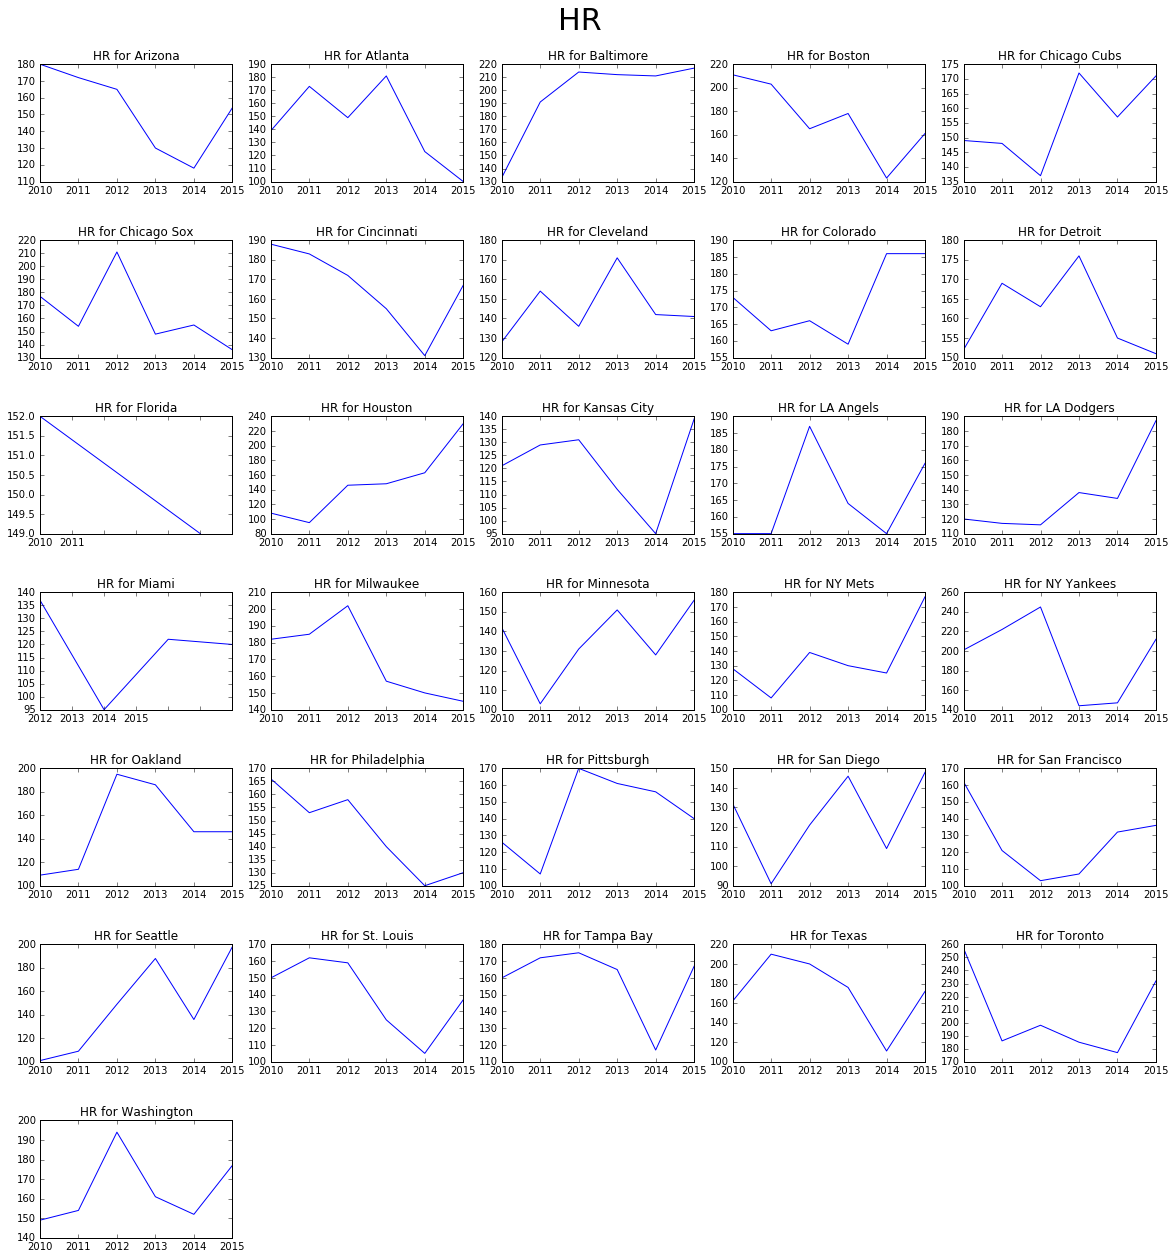

In [14]:
## Call the above function to produce plots for HR
produce_plots_over_seasons(combined_df,'HR')

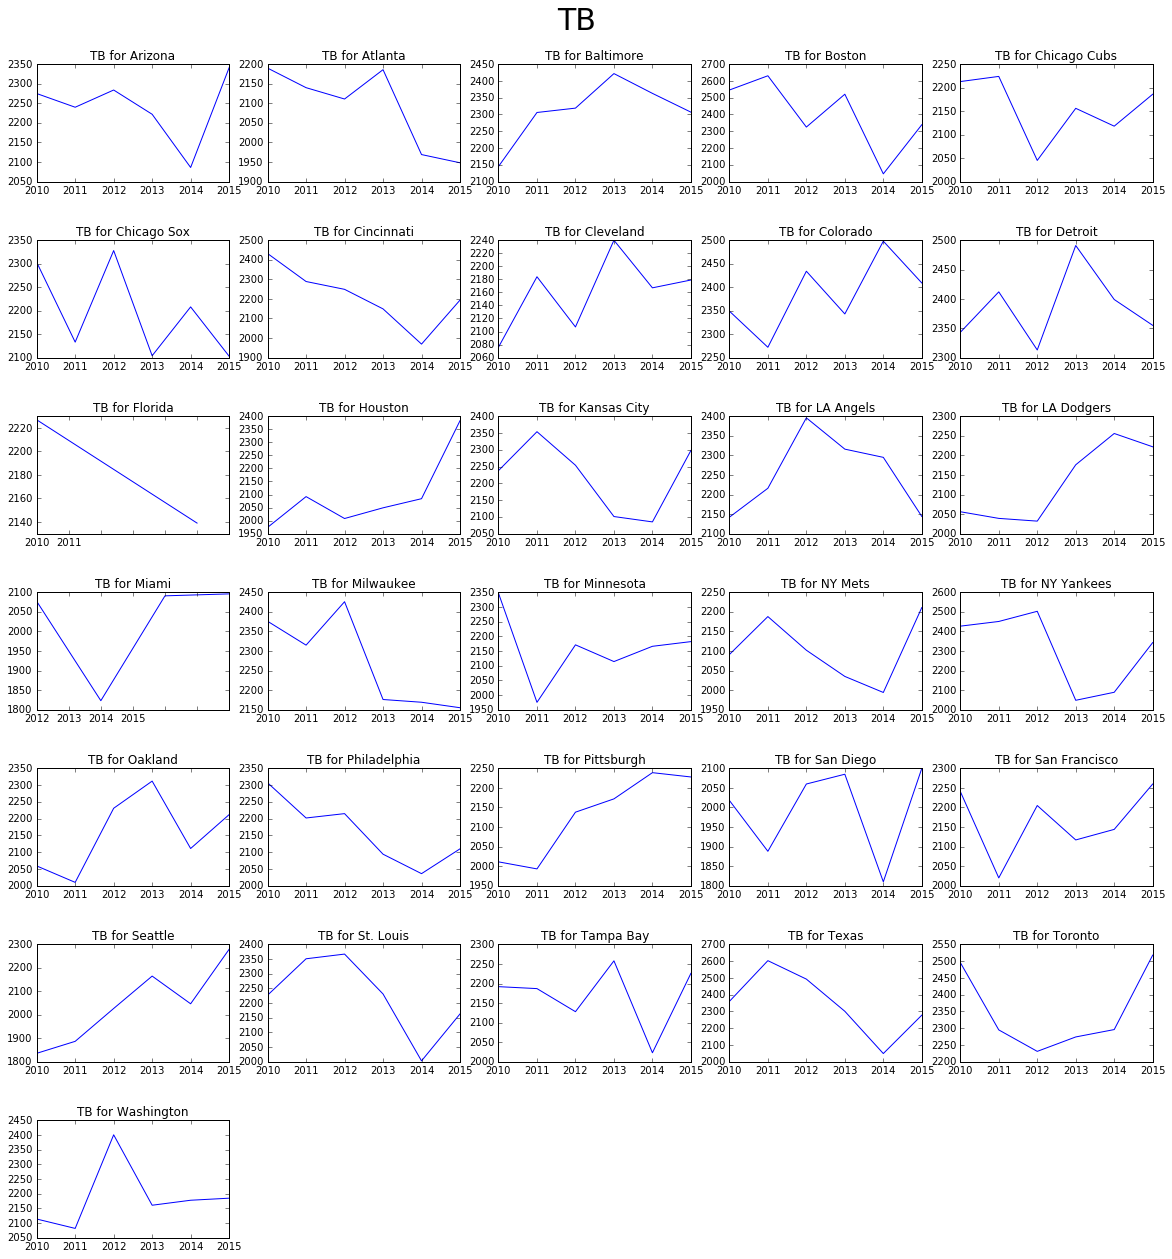

In [15]:
## Call the above function to produce plots for TB
produce_plots_over_seasons(combined_df,'TB')

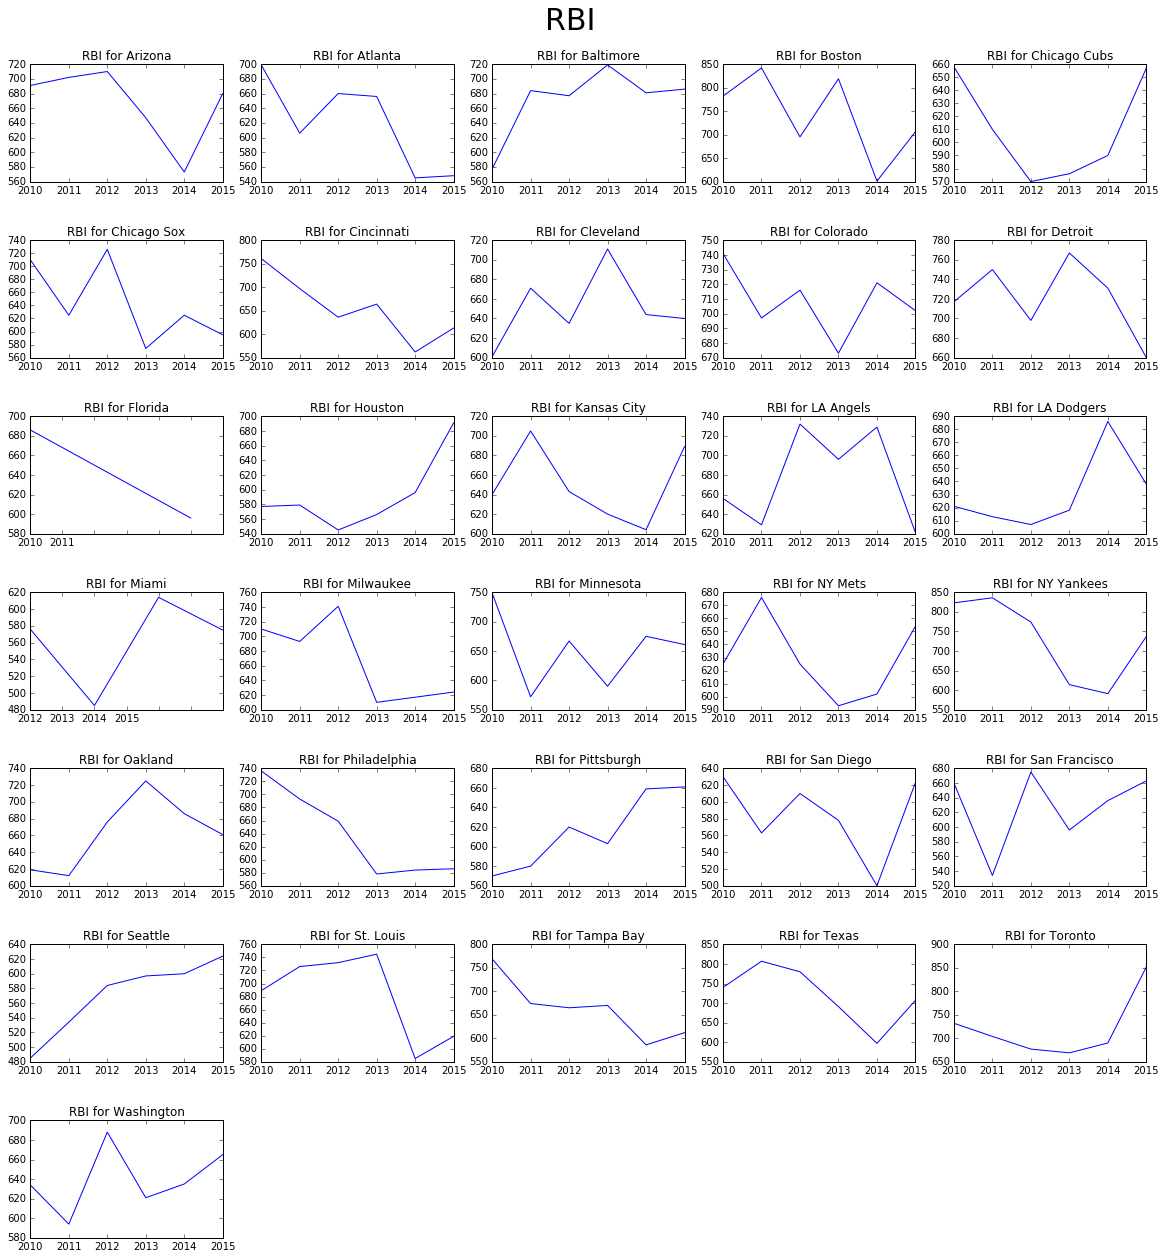

In [16]:
## Call the above function to produce plots for RBI
produce_plots_over_seasons(combined_df,'RBI')